In [1]:
import os

os.chdir("D:\\Documents\\GitHub\\medical-imaging-evaluation")

In [2]:
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from model.metrics.metrics_wrapper import Metrics

In [3]:
train_eval = pd.read_csv('data/OpenPart.csv')
test_eval = pd.read_csv('data/SecretPart_dummy.csv')
train_eval.head()

,Case,Sample 1,Sample 2,Sample 3
0,00000072_000.png,1,5,1
1,00000150_002.png,5,5,3
2,00000181_061.png,4,4,3
3,00000211_019.png,4,4,2
4,00000211_041.png,3,5,2


In [16]:
train_names = train_eval['Case'].to_numpy()
test_names = test_eval['Case'].to_numpy()
val_indices = np.random.choice(train_names.shape[0], 15, replace=False)
train_indices = [i for i in range(len(train_names)) if i not in val_indices]
val_names = train_names[val_indices]
train_names = train_names[train_indices]
print('train size =', len(train_names))
print('validation size =', len(val_names))

train size = 45
validation size = 15


In [13]:
train_eval.iloc[train_indices]

,Case,Sample 1,Sample 2,Sample 3
1,00000150_002.png,5,5,3
2,00000181_061.png,4,4,3
4,00000211_041.png,3,5,2
5,00000344_003.png,2,3,1
6,00000468_033.png,2,5,5
8,00000830_000.png,3,3,3
9,00000974_002.png,1,4,1
10,00001075_024.png,3,2,3
11,00001187_006.png,2,1,1
12,00002350_001.png,5,3,3


In [6]:
def load_data(names, folder, ending):
    data = []
    for name in names:
        image = cv2.imread(folder + '/' + name.split('.')[0] + ending + '.png', 0)
#         image = (image > 10).astype(np.int_)
        data.append(image)
    return np.array(data)

train_data = [
    load_data(train_names, 'data/sample_1', '_s1'),
    load_data(train_names, 'data/sample_2', '_s2'),
    load_data(train_names, 'data/sample_3', '_s3')
]
val_data = [
    load_data(val_names, 'data/sample_1', '_s1'),
    load_data(val_names, 'data/sample_2', '_s2'),
    load_data(val_names, 'data/sample_3', '_s3')
]
test_data = [
    load_data(test_names, 'data/sample_1', '_s1'),
    load_data(test_names, 'data/sample_2', '_s2'),
    load_data(test_names, 'data/sample_3', '_s3')
]
expert_train = load_data(train_names, 'data/expert', '_expert')
expert_val = load_data(val_names, 'data/expert', '_expert')
expert_test = load_data(test_names, 'data/expert', '_expert')

In [7]:
def compute_metrics(ex, pred):
    if ex.sum() == 0 and pred.sum() == 0:
        return [0] * 7
    elif ex.sum() == 0 or pred.sum() == 0:
        return [-1] * 7
    metrics = Metrics(ex, pred)
    result = []
    result.append(metrics.average_surface_distance())
    result.append(metrics.dice_coefficient())
    result.append(metrics.robust_hausdorff(0))
    result.append(metrics.robust_hausdorff(50))
    result.append(metrics.robust_hausdorff(100))
    result.append(metrics.surface_overlap_tolerance())
    result.append(metrics.dice_coefficient_tolerance())
    return result

def make_dataframe(expert, predicted):
    data = []
    for i in range(len(expert)):
        metrics = compute_metrics(expert[i], predicted[i])
        row = []
        for m in metrics:
            if type(m) == tuple:
                row.append(m[0])
                row.append(m[1])
            else:
                row.append(m)
        data.append(np.array(row))
    return pd.DataFrame(data)

In [95]:
make_dataframe(expert_train, train_data[0])

,0,1,2,3,4,5,6,7,8
0,16.464139,14.026719,0.520065,9.848858,14.422205,30.066593,0.000000,0.000000,0.000000
1,55.568461,132.595403,0.519559,0.000000,84.899941,460.651712,0.013096,0.005527,0.008180
2,65.103659,98.168188,0.708670,0.000000,61.294372,361.247837,0.002758,0.001580,0.002133
3,64.969084,190.933578,0.562957,0.000000,113.000000,610.921435,0.016498,0.009258,0.011927
4,52.766829,341.206378,0.169319,0.000000,369.855377,742.752314,0.008731,0.001494,0.002552
5,11.527321,250.449771,0.244048,0.000000,226.850171,637.134994,0.068644,0.012223,0.022072
6,51.646097,169.683376,0.233938,0.000000,148.822041,523.197859,0.030655,0.009543,0.014542
7,17.967957,150.712894,0.243452,0.000000,128.701204,430.345210,0.021492,0.005776,0.008853
8,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,NaN
9,99.307715,14.660960,0.642036,0.000000,26.832816,373.957217,0.058521,0.088322,0.070073


00000150_002.png


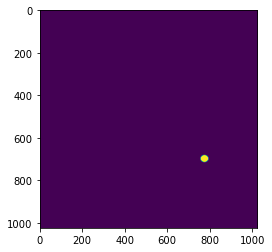

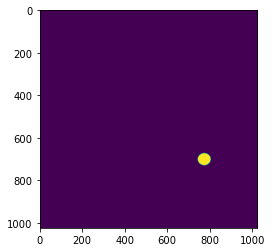

00000181_061.png


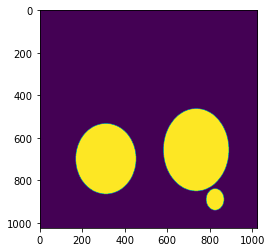

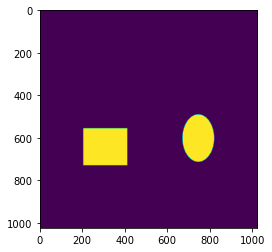

00000211_041.png


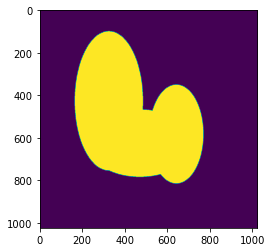

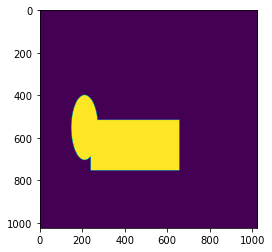

00000344_003.png


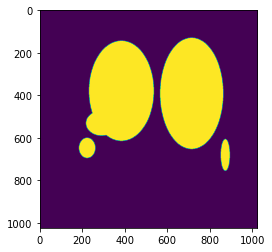

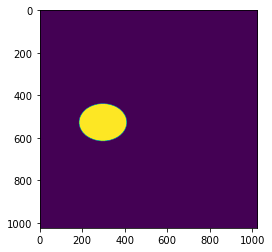

00000468_033.png


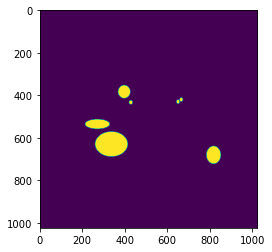

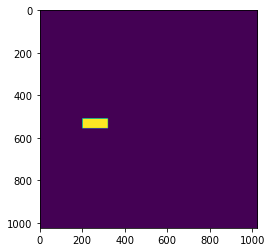

00000830_000.png


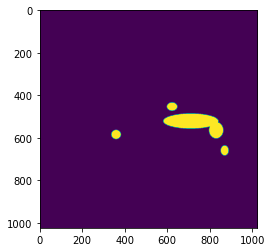

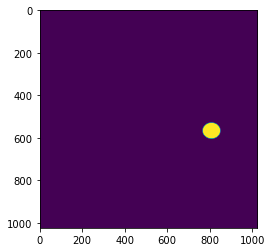

00000974_002.png


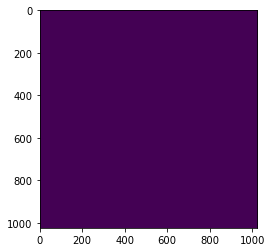

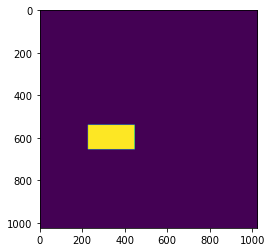

00001075_024.png


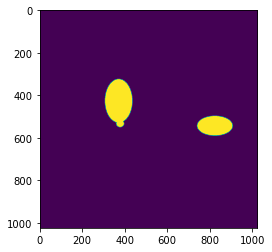

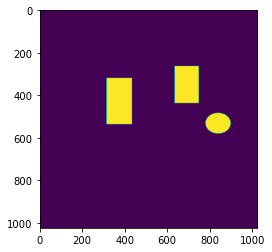

00001187_006.png


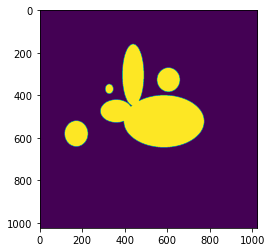

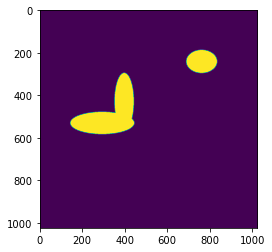

00002350_001.png


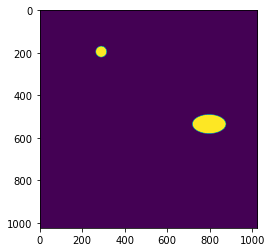

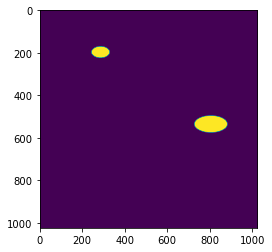

In [15]:
for i in range(0, 10):
    print(train_names.iloc[i])
    plt.imshow(train_data[0][i])
    plt.show()
    plt.imshow(expert_train[i])
    plt.show()